# Задача 1: Леденцы

### Let's Import all necessary libraries

In [179]:
import pandas as pd
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

import os

In [180]:
import seaborn as sns

In [181]:
# This is my file path for the lab works
os.chdir("C:/Users/bahra/Desktop/Lect_01/AD на Python/Задачи для лабораторной 1-3/задача_1_леденцы")


In [182]:
# The data is concatenated by ';', so I will separate it by ';'.
# There is no need for header, the dataset has better header.
# I think, it is not necessery for index column as well.
df = pd.read_csv('Леденцы.dat', sep=";", header = 0, index_col=False)

# Let's see what this dataset has in it.
df

V1  V2  V3  V4  V5  V6  V7  V8  V9  V10  V11
0     4   5   5   5   3   3   3   3   3    3    3
1     5   4   5   5   3   3   3   3   3    3    3
2     5   5   4   5   3   3   3   3   3    3    3
3     5   4   5   5   3   3   3   3   3    3    3
4     4   5   5   5   3   3   3   3   3    3    3
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...
333   3   3   3   3   3   3   5   5   3    3    3
334   3   3   3   3   3   3   5   5   3    3    3
335   3   3   3   3   3   3   5   5   3    3    3
336   3   3   3   3   3   3   5   5   3    3    3
337   3   3   3   3   3   3   5   5   3    3    3

[338 rows x 11 columns]

#### As we can see 338 rows and 11 columns
The data is well organized

In [183]:
print(df.shape)

(338, 11)


In [184]:
df.dtypes

V1     int64
V2     int64
V3     int64
V4     int64
V5     int64
V6     int64
V7     int64
V8     int64
V9     int64
V10    int64
V11    int64
dtype: object

#### Standardization data? 
I don't think, we need to do this process. 
Becuase, the data has well ratio between columns and also same data-type.

In [185]:
# Let's see the initial describtion of our dataset.
# I will use round() method, so the values should be readable.

df.describe(include='all').round(2)

V1      V2      V3      V4      V5      V6      V7      V8      V9  \
count  338.00  338.00  338.00  338.00  338.00  338.00  338.00  338.00  338.00   
mean     3.54    3.53    3.52    3.41    3.21    3.20    3.25    3.29    3.60   
std      0.96    0.96    0.99    0.99    0.87    0.87    0.84    0.82    0.97   
min      2.00    2.00    2.00    2.00    2.00    2.00    2.00    2.00    2.00   
25%      3.00    3.00    3.00    3.00    3.00    3.00    3.00    3.00    3.00   
50%      3.00    3.00    3.00    3.00    3.00    3.00    3.00    3.00    3.00   
75%      5.00    5.00    5.00    4.00    3.00    3.00    3.00    3.00    5.00   
max      5.00    5.00    5.00    5.00    5.00    5.00    5.00    5.00    5.00   

          V10     V11  
count  338.00  338.00  
mean     3.55    3.57  
std      0.93    0.94  
min      2.00    2.00  
25%      3.00    3.00  
50%      3.00    3.00  
75%      5.00    5.00  
max      5.00    5.00

#### Let's see how many clusters are there.

This is just for observations. In addition, I will use the Histogram for observations. If I could really tell how many clusters are there without any clustering methods.

(array([[ 19.,   0.,   0., 209.,   0.,   0.,  17.,   0.,   0.,  93.],
        [ 24.,   0.,   0., 200.,   0.,   0.,  26.,   0.,   0.,  88.],
        [ 31.,   0.,   0., 193.,   0.,   0.,  22.,   0.,   0.,  92.],
        [ 50.,   0.,   0., 174.,   0.,   0.,  39.,   0.,   0.,  75.],
        [ 47.,   0.,   0., 226.,   0.,   0.,  13.,   0.,   0.,  52.],
        [ 48.,   0.,   0., 225.,   0.,   0.,  13.,   0.,   0.,  52.],
        [ 34.,   0.,   0., 238.,   0.,   0.,  12.,   0.,   0.,  54.],
        [ 25.,   0.,   0., 244.,   0.,   0.,  15.,   0.,   0.,  54.],
        [ 15.,   0.,   0., 207.,   0.,   0.,  13.,   0.,   0., 103.],
        [ 15.,   0.,   0., 210.,   0.,   0.,  25.,   0.,   0.,  88.],
        [ 15.,   0.,   0., 210.,   0.,   0.,  20.,   0.,   0.,  93.]]),
 array([2. , 2.3, 2.6, 2.9, 3.2, 3.5, 3.8, 4.1, 4.4, 4.7, 5. ]),
 <a list of 11 BarContainer objects>)

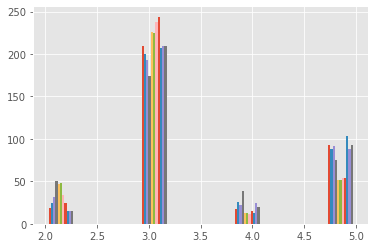

In [186]:
# Simple hist() method
plt.hist(df)

### My observation!
As you can see, it is obvoius that there are 4 clusters for each same identical datas (values).

###  K-means clustering using Elbow method
I use elbow method for getting the clusters automatically, as you know K-means has a disadvantage (it requires us to provide cluster size for variable k. That is why I use elbow method.
For better undrestanding and observations, I will use K-mean clustering. Thus, if the data really has 4 clusters.

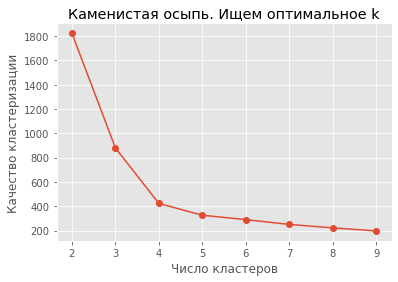

In [158]:
# A range of values between 2 and 10, because we know that it will not be more than 10 clusters
K = range(2, 10)


models = [KMeans(n_clusters=k, random_state=42, n_init=10, verbose=0).fit(df) for k in K]

dist = [model.inertia_ for model in models]

plt.plot(K, dist, marker='o')
plt.xlabel('Число кластеров')
plt.ylabel('Качество кластеризации')
plt.title('Каменистая осыпь. Ищем оптимальное k')
plt.show()

In [160]:
# Now let's see what kind of values we got from K-means in the model
model = KMeans(n_clusters=4, random_state=42, max_iter=300, n_init=10, verbose=0)
model.fit(df)
df['cluster'] = model.labels_
df.groupby('cluster').mean().round(2)

V1    V2    V3    V4    V5    V6    V7    V8    V9   V10   V11
cluster                                                                  
0        4.85  4.80  4.84  4.68  3.04  3.04  3.00  2.99  3.07  3.05  3.05
1        3.00  2.97  2.97  2.92  2.92  2.95  4.92  4.92  3.00  3.00  3.00
2        2.82  2.83  2.77  2.62  2.61  2.58  2.75  2.92  4.95  4.81  4.86
3        3.00  3.00  3.00  3.00  4.85  4.85  3.00  2.92  2.75  2.75  2.75

###  Interpretation based on K-means
I think the clusters are large enought and has measurable values

###### 3rd Cluster: V9, V10, V11 with Highest values and v6 with Lowest values
* Highest Values: We can say, these values show that how people consum lollipop to feel better, get rid of nasal congestion and relieve a sore throat
* Lowest Values: We can say, these people who consum lollipop are not that much in terms of density and majority such as: They consum lollipops only when they want something sweet

##### And based on the size of clusters in first two clusters, I can say these two are most dense and have more values (big enough). The other two last clusters are not that much big and have a less values.

#### But it is not enough
Let's use Hierarchical Clustering method with dendrograms. 
How many clusters we will get?

In [126]:
# Scipy library
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

####  Let's delete the cluster column, that we created after using K-means

In [161]:
del df['cluster']

In [164]:
# Let's see the dataset once again
df

V1  V2  V3  V4  V5  V6  V7  V8  V9  V10  V11
0     4   5   5   5   3   3   3   3   3    3    3
1     5   4   5   5   3   3   3   3   3    3    3
2     5   5   4   5   3   3   3   3   3    3    3
3     5   4   5   5   3   3   3   3   3    3    3
4     4   5   5   5   3   3   3   3   3    3    3
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...
333   3   3   3   3   3   3   5   5   3    3    3
334   3   3   3   3   3   3   5   5   3    3    3
335   3   3   3   3   3   3   5   5   3    3    3
336   3   3   3   3   3   3   5   5   3    3    3
337   3   3   3   3   3   3   5   5   3    3    3

[338 rows x 11 columns]

In [165]:
# Clustering
# I use default parameters (ward, euclidean), to see what will I get.
link = linkage(df, 'ward', 'euclidean')

In [166]:
# Type of the data we got after linkage function
type(link)

numpy.ndarray

In [167]:
# Shape of the data
link.shape

(337, 4)

In [168]:
# Let's see what is inside 
link

array([[  0.        ,   4.        ,   0.        ,   2.        ],
       [  1.        ,   3.        ,   0.        ,   2.        ],
       [  2.        ,   6.        ,   0.        ,   2.        ],
       ...,
       [664.        , 669.        ,  30.21829021, 120.        ],
       [667.        , 672.        ,  43.44161878, 230.        ],
       [671.        , 673.        ,  51.70554708, 338.        ]])

In [169]:
# Fisrt 10 rows
link[:10]

array([[  0.,   4.,   0.,   2.],
       [  1.,   3.,   0.,   2.],
       [  2.,   6.,   0.,   2.],
       [  5., 339.,   0.,   3.],
       [ 32., 338.,   0.,   3.],
       [  7., 341.,   0.,   4.],
       [  8.,  30.,   0.,   2.],
       [ 12.,  15.,   0.,   2.],
       [ 16., 345.,   0.,   3.],
       [ 17., 346.,   0.,   4.]])

#### What I got?
I can see that there are 4 clusters. 
The question, is it ok and best possible clusters?

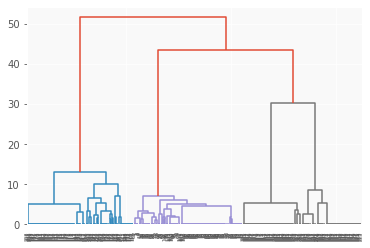

In [170]:
# Let's draw our dendrogram by the link arrry
dn = dendrogram(link)

#### I think, it good enough for now

Now, I will save the clusters to the data by adding new column called ('clusters')

In [171]:
# Saving the results in the new column
df['cluster'] = fcluster(link, 4, criterion='maxclust')

In [172]:
# Let's what got after clustering
# Let's see the mean for clusters by grouping
df.groupby('cluster').mean().round(2)

V1    V2    V3    V4    V5    V6    V7    V8    V9   V10   V11
cluster                                                                  
1        2.82  2.83  2.77  2.62  2.61  2.58  2.75  2.92  4.95  4.81  4.86
2        4.85  4.80  4.84  4.68  3.04  3.04  3.00  2.99  3.07  3.05  3.05
3        3.00  2.97  2.97  2.92  2.92  2.95  4.92  4.92  3.00  3.00  3.00
4        3.00  3.00  3.00  3.00  4.85  4.85  3.00  2.92  2.75  2.75  2.75

###  Interpretation based on Hierarchical Analysis (Dendrogram)
I think the clusters are large enought and has measurable values

###### 1st Cluster: V9, V10, V11 with Highest values and V6, V5, V4 with Lowest values
* Highest Values: We can say, these values show that how people consum lollipop to feel better, get rid of nasal congestion and relieve a sore throat
* Lowest Values: We can say, these people who consum lollipop are not that much in terms of density and majority such as: They consum lollipops for something sweat, to get rid of bad taste and a substitute for other confectionery

###### 2nd Cluster: V1, V2, V3, V4 with Highest values and V8 with Lowest values
* Highest Values: We can say, these values show that how people consum lollipop to freshen their breath, feel more confident, refresh their mounth and get rid of bad taste.
* Lowest Values: We can say, these people who consum lollipop are not that much in terms of density and majority such as: They consum lollipops only to distract themselfs for a few minutes.

##### And based on the size of clusters in first two clusters, I can say these two are most dense and have more values (big enough). The other two last clusters are not that much big and have a less values.

### But!!!???
We cannot be sure in the end. Maybe, there are sub-clusters in these clusters.

In [173]:
# Size of clusters
df.groupby('cluster').size()

cluster
1    108
2    110
3     59
4     61
dtype: int64

#### Breaking down every cluster values

In [174]:
# Fist row
df[df['cluster']==1].index.values

array([110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
       123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135,
       136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148,
       149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161,
       162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174,
       175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187,
       188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200,
       201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213,
       214, 215, 216, 217], dtype=int64)

In [175]:
# Second row
df[df['cluster']==2].index.values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109], dtype=int64)

In [176]:
# Third row
df[df['cluster']==3].index.values

array([279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291,
       292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304,
       305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317,
       318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330,
       331, 332, 333, 334, 335, 336, 337], dtype=int64)

In [177]:
# Forth row
df[df['cluster']==4].index.values

array([218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230,
       231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243,
       244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256,
       257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269,
       270, 271, 272, 273, 274, 275, 276, 277, 278], dtype=int64)

## Concluions and Analysis

##### The dataset was normal (no abnormal values, no null values and the ratio between column were normal).
##### After simple observation, I already knew that there are 4 clusters by using simple Histogram.
##### After using K-means, I was sure that it is really the dataset has 4 clusters.
##### After using Hierarchical Analysis using dendrograms, I got sure that the dataset really is divided into 4 clusters.
##### The dataset was normal (no abnormal values, no null values and the ratio between column were normal).
####  I think, this enough for;
    From a marketer's point of view, segments should be interpretable, measurable, and large enough. Typically, segmentation is part of a larger research.
